# Examen Parcial de Programación para Machine Learning

Instrucciones:
* Por favor, complete las tareas de este notebook. Deberá enviar este notebook, así como una versión en PDF, a la plataforma Univirtual.
* Para crear el PDF, vaya a Archivo > Descargar como. Puede exportar a PDF mediante Latex, o exportar a HTML y luego imprimir a PDF.
* Añada una explicación clara de su enfoque y una interpretación detallada de sus resultados para cada subpregunta. Para ello, utilice celdas Markdown.

* Añada a continuación los nombres de todos los miembros del equipo.

**Integrantes:**

1.   Integrante 1: Josiel Corbera Terrones
2.   Integrante 2: Jesús Fernando Montalvo Olazabal
3.   Integrante 3: Smith Vera Reyes
4.   Integrante 4: Alex Munive Mendoza
5.   Integrante 5: Raúl Rivas Jiménez
6.   Integrante 6:

# 1. NUMPY -MATPLOTLIB

En esta tarea aprenderás e implementarás [Cadenas de Markov](https://en.wikipedia.org/wiki/Markov_chain), si nunca has oído hablar de ellas, no te preocupes, este notebook te explicará todo lo necesario para la tarea.

## Cadenas de Markov
La mejor manera de introducir lo que es una cadena de Markov es con un ejemplo sencillo. Supongamos que tienes un contador sencillo que puedes ajustar a cualquier número entre 1 y 10 (incluyendo 1 y 10). En cada paso se lanza un dado estándar de 6 caras y, dependiendo de si el número obtenido es par o impar, se incrementa o disminuye el contador. Si tratas de incrementar a 10, digamos que se desplaza alrededor de 0 y de manera similar para tratar de disminuir a 0. Ahora puedes jugar este juego para múltiples pasos y registrar el valor del contador después de cada paso, esto es sólo una simple cadena de Markov.

He aquí un ejemplo de evolución de la cadena de markov,
Empieza con el contador a 1.
- Paso 1 : Sacas un 4, es par así que incrementa el contador a 2.
- Paso 2 : Sacas un 2, es par así que incrementa el contador a 3.
- Paso 3 : Sacas un 5, es impar asi que decrementa el contador a 2.

etc.

Una cadena de Markov consiste en un conjunto de n estados (en nuestro ejemplo, los 10 estados del contador) y una regla probabilística para saltar a otro estado en cada paso (las tiradas de dados). Aunque en nuestro sencillo ejemplo teníamos una regla similar para cada estado, puedes tener una regla diferente para cada estado. Por ejemplo puedes decir que si el contador es impar, no lances un dado, siempre incrementa, y sigue el dado para estados pares. La regla es siempre en forma de n probabilidades que suman uno. Cada probabilidad indica la posibilidad de que salte a ese estado.

En nuestro ejemplo la regla para el estado 1 puede ser representada por este vector numpy



In [1]:
import numpy as np
np.array([0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

array([0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

El índice en el array representa el estado y el valor representa la probabilidad con la que saltará a ese estado. De forma similar, ésta es la regla para el estado 5

In [2]:
np.array([0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ])

array([0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ])

## Matriz de transición

La forma de representar las cadenas de markov es con una matriz de transición $T$ de tamaño (n,n), donde la columna i será el vector de reglas para el estado i ( Aquí estamos suponiendo que los estados se numeran de 0 a n-1 ).

Así se puede interpretar el elemento $T_{ij}$ de la matriz como la probabilidad de saltar al estado i desde el estado j.

## Pregunta 1 (1.25 puntos)

Escriba una función que devuelva la matriz de transición de la siguiente cadena de markov, dado el número de estados como argumento.

La regla de la cadena de markov es la siguiente,

Si el estado actual es i
1. Con probabilidad 0.8, pasa al estado i+1
2. Con probabilidad 0,2, vuelve al estado i = 0.
3. En el estado n-1, como no puede subir más, con probabilidad 1 se queda en el mismo estado de n-1.

Intuitivamente, esta cadena de Markov se comporta de la siguiente manera, en cada paso hay un 80% de probabilidad de que suba 1 y un 20% de probabilidad de que caiga completamente, sin embargo, si llega al estado final n-1, se queda allí para siempre.

En esta pregunta **no** puedes utilizar ningún bucle for, en su lugar utiliza la indexación de numpy para rellenar tu matriz. Puedes asumir que n es al menos 3.

Pistas:
1. Primero escribe tu código en una celda vacía for con un valor n predefinido (hardcoded), de esta manera puedes iterar rápidamente y obtener la respuesta correcta primero. Luego cópialo en la función.
2. Puedes usar [Array indexing](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html#index-arrays)

In [7]:
#YOUR CODE HERE
def transition_matrix(n):
    m = n - 1
    matriz_transicion = np.zeros((n,n))
    matriz_transicion[0,:m] = 0.2 * np.ones((1,m))
    matriz_transicion[m,m] = 1
    np.fill_diagonal(matriz_transicion[1:,:m], [0.8] * m)
    return matriz_transicion

In [8]:
#TESTING
transition_matrix(10)

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 1. ]])

Para probar su función , compruebe que lo anterior devuelve
```
array([[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 1. ]])
```

## Pregunta 2 (1.25 puntos)

Ahora queremos utilizar la matriz de transición para saber cuáles son las probabilidades de estar en cada estado después de ejecutar la cadena de markov durante k pasos. Por ejemplo, para la cadena de markov anterior, quiero saber después de 30 pasos, cuál es la probabilidad de que haya alcanzado el estado n-1.

Por suerte, esto es bastante fácil de calcular, utilizando la multiplicación de matrices. Una propiedad sorprendentemente útil de la matriz de transición es la siguiente, si tienes el vector $p_j$ como el vector de probabilidades después del paso $j$, entonces $p_{j+1}$ viene dado por el siguiente producto vectorial de matrices.

$$ p_{j+1} = Tp_j $$

No vamos a demostrar este resultado aquí, pero si pasas algún tiempo pensando en lo que la multiplicación de matrices está haciendo aquí, sobre todo interpretarlo como tomar una combinación lineal de columnas, entonces debería tener sentido.

Así, si alguien le da una distribución de probabilidad para el estado inicial como $ p_0 $, entonces la distribución de probabilidad después de $ k $ pasos es simplemente dado por multiplicar por la matriz de transición k veces

$$ p_{k} = T^{k}p_0 $$

Implemente una función que dada una distribución inicial `p0`, el número de pasos `k` y una matriz de transición `tm`, devuelva la distribución después de k pasos

In [9]:
#YOUR CODE HERE
def propagate(p0, k, tm):
    return np.linalg.matrix_power(tm, k) @ p0 

tm = transition_matrix(10)
p0 = np.zeros(10)
p0[0] = 1
pk = propagate(p0, 30, tm)

In [10]:
#TESTING
tm = transition_matrix(10)
p0 = np.zeros(10)
p0[0] = 1
pk = propagate(p0,30,tm)
pk

array([0.0816156 , 0.06787354, 0.05644353, 0.04694437, 0.03904617,
       0.03247669, 0.02701094, 0.02246264, 0.01867741, 0.6074491 ])

El código debería retornar:

```
array([0.0816156 , 0.06787354, 0.05644353, 0.04694437, 0.03904617,
       0.03247669, 0.02701094, 0.02246264, 0.01867741, 0.6074491 ])
```

## Pregunta 3 (1.25 puntos)

Ahora usa la función anterior para graficar (plot) las probabilidades al final de cada paso para los primeros 10 pasos en la misma gráfica.
1. Cree una matriz de transición para n = 10
2. Cree un vector que represente el estado inicial que se encuentra en el estado 0 con probabilidad 1.
3. Grafique en la misma figura la distribución de probabilidad después de cada paso para 10 pasos
4. Asegúrate de etiquetar los ejes X e Y, y dale un título al gráfico, guarda el gráfico en un archivo llamado "qsn3.png"

### 3.1. Cree una matriz de transición para n = 10

In [24]:
#YOUR CODE HERE
tm = transition_matrix(10)
tm

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 1. ]])

### 3.2. Cree un vector que represente el estado inicial que se encuentra en el estado 0 con probabilidad 1.

In [25]:
p0 = np.zeros(10)
p0[0] = 1

### 3.3. Grafique en la misma figura la distribución de probabilidad después de cada paso para 10 pasos

[0.2 0.8 0.  0.  0.  0.  0.  0.  0.  0. ]
[0.2  0.16 0.64 0.   0.   0.   0.   0.   0.   0.  ]


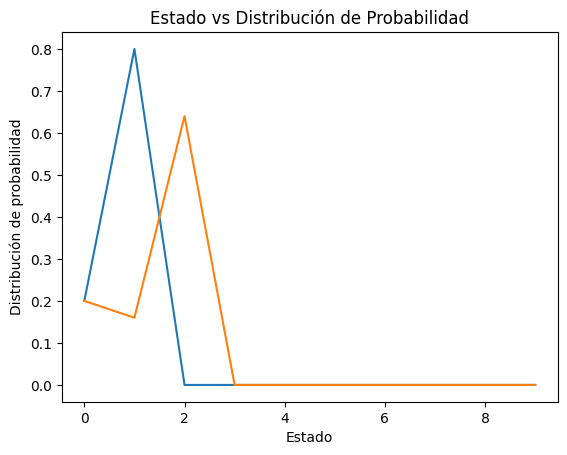

In [30]:
from matplotlib import pyplot as plt

estados = np.arange(10)
for k in range(1,3):
    print(propagate(p0, k, tm))
    plt.plot(estados, propagate(p0, k, tm))

plt.title("Estado vs Distribución de Probabilidad")
plt.xlabel("Estado")
plt.ylabel("Distribución de probabilidad")
plt.savefig("qsn3.png")
plt.show()

## Pregunta 4 (1.75 puntos)
### Parte a
Utiliza las funciones que has implementado para calcular lo siguiente :

¿Cuántos pasos se necesitan para que la probabilidad de estar en el estado final sea al menos 0,5?

Después de cada paso la probabilidad de estar en el estado final aumenta lentamente. En algún momento esta probabilidad superará el 50%. Lo que hay que calcular es cuántos pasos hacen falta para cruzar el 50%.

De nuevo, utiliza una matriz de transición n=10 y empieza en el estado 0.

Pista:
1. Use el bucle while

In [ ]:
#YOUR CODE HERE

### Parte b
Convierta el código anterior en una función que calcule el número de pasos hasta el 50% de probabilidad en el estado final dado `n` el tamaño de la cadena de markov

In [ ]:
#YOUR CODE HERE
def num_steps(n):
    pass

### Parte c
Calcula y grafica el número de pasos necesarios para $n$ entre 10 y 40.

Busca la función de trazado `plt.semilogy` y entiende lo que hace, traza otro gráfico del número de pasos utilizándola.

¿Qué te dice el gráfico semilogía?

Guarda los gráficos como "qsn4c.png" y "qsn4c_semilogy.png".

In [ ]:
#YOUR CODE HERE

## Pregunta 5 (1.25 puntos)

Ahora queremos calcular también algunas evoluciones muestrales de las cadenas de markov. ¿Qué significa esto? Queremos una secuencia de estados trazada según las reglas de la cadena de markov. Por lo tanto, queremos utilizar el azar para elegir cuál es el siguiente estado. Así, cada llamada a la función devolverá una respuesta diferente, una nueva muestra.

Por ejemplo, consideremos la cadena de Markov que hemos estado utilizando: sube con una probabilidad del 80% o baja a 0 en caso contrario; una vez que alcanza el último estado, se queda atascada en él. He aquí una muestra de 20 pasos.

```[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9]```

Escribe una función que devuelva una muestra por cada llamada. Debe tomar la matriz de transición `tm`, el número de pasos `k` y un estado inicial `s0` y devolver una matriz de tamaño `k+1` de estados (incluyendo el estado inicial).

In [ ]:
import numpy.random as rnd


In [ ]:
#YOUR CODE HERE
def sample(tm, k, s0):
    pass

Utiliza el siguiente código para probar algunas de las muestras, muestrea 20 trayectorias de la cadena de Markov y las representa gráficamente. El gráfico debería mostrar que casi todas o todas las trayectorias habrían alcanzado el estado final al final. Guarda este gráfico como «qsn5.png».

In [ ]:
#TESTING
import matplotlib.pyplot as plt
tm = transition_matrix(10)
k = 20
s0 = 0

for i in range(20):
    states = sample(tm, 100, s0)
    plt.plot(states)

plt.savefig("qsn5.png")

## Pregunta 6 (1.5 puntos)

Dado que los estados se incrementan aproximadamente en 1 o caen a 0, queremos saber cómo es el ritmo de progreso en promedio.

1. Crea una matriz de transición para n = 25
2. Muestrea 1000 trayectorias de 100 pasos usando la función de muestreo que escribiste anteriormente.
3. Calcula el estado medio (sobre las 1000 muestras) en cada paso de tiempo.
4. Grafica el estado promedio vs pasos de tiempo y guardalo como «qsn6.png».

Sugerencias:
1. Deberías ver un gráfico en el que la media sube rápidamente y luego aumenta lentamente hasta el final.


In [ ]:
#YOUR CODE HERE


## Pregunta 7 (2 puntos)
Ahora queremos verificar si nuestra implementación del muestreo es consistente con nuestra implementación del cálculo de la distribución de probabilidad.

1. Crear una matriz de transición para n = 25
2. Muestree 1000 trayectorias de 100 pasos utilizando la función de muestreo que escribió anteriormente, registre el último estado para cada trayectoria en una lista separada.
3. Muestra un histograma de los estados finales
4. Utiliza la función `propagate` que escribiste para calcular la distribución teórica después de 100 pasos
5. Muestra la distribución esperada en el mismo gráfico y comprueba que coincide con el histograma.
6. Guarda el gráfico como «qsn7.png».

Sugerencias:
1. Para el histograma puede configurar manualmente los "bins" para que haya un "bin" para cada estado. Para ello, establezca los límites de los contenedores en ... 2.5, 3.5, ... De esta forma, el estado 3 tendrá un bin entre 2,5 y 3,5.

2. La función propagar devuelve una distribución de probabilidad, es necesario multiplicarla por el número de muestras para que sea comparable con el histograma.


In [ ]:
#YOUR CODE HERE

# 2. Pandas

## Parte 1
El siguiente código carga el conjunto de datos de los Juegos Olímpicos (olympics.csv), que se obtuvo de la entrada de Wikipedia sobre [Medallas de todos los Juegos Olímpicos](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table), y realiza una limpieza básica de los datos.

Las columnas están organizadas en # of Summer games, Summer medals, # of Winter games, Winter medals, total # number of games, total # of medals. Use this dataset to answer the questions below.

In [ ]:
import pandas as pd

df = pd.read_csv('olympics.csv', index_col=0, skiprows=1)

for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

names_ids = df.index.str.split('\s\(') # split the index by '('

df.index = names_ids.str[0] # the [0] element is the country name (new index)
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


### Pregunta 8 (Ejemplo) (0.25 puntos)

¿Cuál es el primer país en df?

*Esta función debería devolver una Serie.*

In [ ]:
def answer_one():

    # YOUR CODE HERE
    raise NotImplementedError()
answer_one()

135

### Pregunta 9 (0.25 puntos)
¿Qué país tiene la mayor diferencia entre sus medallas de oro de verano y de invierno?

*Esta función debe devolver un único string.*

In [ ]:
def answer_two():
    # YOUR CODE HERE
    raise NotImplementedError()
answer_two()

135

### Pregunta 10 (0.25 puntos)
¿Qué país tiene la mayor diferencia entre el número de medallas de oro de verano y el número de medallas de oro de invierno en relación con el número total de medallas de oro?

$$\frac{Summer~Gold - Winter~Gold}{Total~Gold}$$

Sólo se incluyen los países que han ganado al menos 1 medalla de oro tanto en verano como en invierno.

*Esta función debe devolver un único string.*

In [ ]:
def answer_three():
    # YOUR CODE HERE
    raise NotImplementedError()
answer_three()

4

### Pregunta 11 (0.25 puntos)
Escriba una función que actualice el dataframe para incluir una nueva columna llamada " Points " que es un valor ponderado donde cada medalla de oro cuenta por 3 puntos, las de plata por 2 puntos y las de bronce por 1 punto. La función debe devolver sólo la columna (un objeto Serie) que ha creado.

*Esta función debe devolver una Serie llamada `Points` de longitud 146*

In [ ]:
def answer_four():
    # YOUR CODE HERE
    raise NotImplementedError()
answer_four()

Afghanistan                           2
Algeria                              27
Argentina                           130
Armenia                              16
Australasia                          22
                                   ... 
Yugoslavia                          171
Independent Olympic Participants      4
Zambia                                3
Zimbabwe                             18
Mixed team                           38
Name: Points, Length: 146, dtype: int64

## Parte 2
Para la siguiente serie de preguntas, utilizaremos los datos del censo de la [Oficina del Censo de Estados Unidos](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2015/). Los condados son subdivisiones políticas y geográficas de los estados de Estados Unidos. Este conjunto de datos contiene datos de población de condados y estados de EE.UU. de 2010 a 2015. [Consulte este documento](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2015/co-est2015-alldata.pdf) para obtener una descripción de los nombres de las variables.

El  dataset del censo (census.csv) debe cargarse como census_df. Responda a las preguntas utilizando esto según corresponda.

### Pregunta 12 (0.5 puntos)
¿Qué estado tiene más condados? (pista: ¡considere el uso de la clave sumlevel! También la necesitará para futuras preguntas...)

*Esta función debe devolver un único string*

In [ ]:
census_df = pd.read_csv('census.csv')
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [ ]:
def answer_five():
    # YOUR CODE HERE
    raise NotImplementedError()
answer_five()

### Pregunta 13 (0.5 puntos)
Teniendo en cuenta sólo los tres condados más poblados de cada estado, ¿cuáles son los tres estados más poblados (en orden de mayor a menor población)?

*Esta función debe devolver una lista de strings.*

In [ ]:
def answer_six():
    # YOUR CODE HERE
    raise NotImplementedError()
answer_six()

['California', 'Texas', 'Illinois']

### Pregunta 14 (0.5 puntos)
¿Qué condado ha tenido el mayor cambio de población en el periodo de cinco años (pista: los valores de población se almacenan en las columnas POPESTIMATE2010 a POPESTIMATE2015, debe tener en cuenta las cinco columnas)?

*Esta función debe devolver un único string.

In [ ]:
def answer_seven():
    # YOUR CODE HERE
    raise NotImplementedError()
answer_seven()

'Dallas County'

### Pregunta 15 (0.5 puntos)
En este archivo de datos, Estados Unidos se divide en cuatro regiones mediante la columna "REGIÓN".

Cree una consulta que encuentre los condados que pertenecen a las regiones 1 ó 2, cuyo nombre empiece por "Washington" y cuyo POPESTIMATE2015 sea mayor que su POPESTIMATE 2014.

*Esta función debe devolver un DataFrame de 5x2 con las columnas = ['STNAME', 'CTYNAME'] y el mismo index  ID que census_df (ordenado ascendentemente por index).*

In [ ]:
def answer_eight():
    # YOUR CODE HERE
    raise NotImplementedError()
answer_eight()

,STNAME,CTYNAME
896,Iowa,Washington County
1419,Minnesota,Washington County
2345,Pennsylvania,Washington County
2355,Rhode Island,Washington County
3163,Wisconsin,Washington County


# 3. Programación Orientada a objetos (overview)

### Pregunta 16 (1.25 puntos)

Cree un programa para administrar pedidos en un restaurante. El programa debe contar con
los siguientes elementos:

* La clase `PlatoDeComida`, representa la comida ordenada por los clientes. Sólo tiene el campo `nombre`, una cadena de
  caracteres proveída por el usuario de la clase.

* La clase `Mesero`, representa al personal que atiende las mesas. Tiene el campo `nombre`, una cadena de caracteres
  proveída por el usuario de la clase.
    * Además, tiene el método `tomar_orden` que tiene como parámetro la cadena de caracteres `nombre_plato`. Este método
      retorna una instancia de
      `PlatoDeComida` con el nombre `nombre_plato`.

* La clase `Cliente` representa a los clientes del restaurante. Tiene dos campos: `plato` es una instancia de
  `PlatoDeComida` e inicialmente tiene el valor de `None`; y `numero_mesa`, un número entero proveído por el usuario de
  la clase.
    * Además, tiene el método `hacer_pedido` que tiene como parámetro la cadena de caracteres `nombre_plato` y `mesero`,
      una instancia de `Mesero`. En este método, se le asigna al campo `plato` el resultado de invocar `tomar_orden`
      en `mesero`.

    * El método `obtener_nombre_plato` retorna una cadena de caracteres, correspondiente al nombre del plato que el
      cliente ha ordenado.

* La clase `Pedido` representa un pedido hecho por un cliente en el restaurante. Tiene dos campos:
  `cliente` es una instancia de `Cliente` y `mesero` es una instancia de `Mesero`. El número de mesa de `cliente` y el
  nombre de `mesero ` son proveídos por el usuario de la clase.
    * Además, tiene el método `ordenar` con el parámetro `plato`, una cadena de caracteres representando el nombre del
      plato ordenado por el cliente. En este método, se invoca al método `hacer_pedido` de la instancia en el
      campo `cliente`.
    * Al invocar `print` sobre instancias de `Pedido`, se debe mostrar el número de mesa, el nombre del mesero, y el
      plato ordenado por el cliente (mediante el método `obtener_nombre_plato`).

* La función `atender_mesa` permite registrar múltiples pedidos por mesa. Recibe como parámetros el número de mesa, el
  nombre del mesero y una lista de cadenas de caracteres, con los platos a ordenar en la mesa. Esta función retorna una
  lista de instancias de `Almuerzo`. Por ejemplo, el siguiente código:

  ```python
    comida_mesa_siete = ["cebiche", "sudado", "arroz con leche"]
    almuerzos = atender_mesa(7, "Tomas", comida_mesa_siete)

    for almuerzo in almuerzos:
        print(almuerzo)
   ```

  Muestra lo siguiente en consola:

    ```commandline
    El cliente de la mesa 7 ordeno cebiche y fue atendido por Tomas
    El cliente de la mesa 7 ordeno sudado y fue atendido por Tomas
    El cliente de la mesa 7 ordeno arroz con leche y fue atendido por Tomas
    ```

In [ ]:
class Pedido(object):
    def __init__(self, numero_mesa, nombre_mesero):


    def ordenar(self, plato):
       return


class Cliente(object):

    def __init__(self, numero_mesa):

    def hacer_pedido(self, nombre_plato, mesero):

    def obtener_nombre_plato(self):



class Mesero(object):

    def __init__(self, nombre):


    def tomar_orden(self, nombre_plato):
        return

class PlatoDeComida(object):

    def __init__(self, nombre):

    def atender_mesa(numero_mesa, mesero, pedidos):


if __name__ == "__main__":
    comida_mesa_siete = ["cebiche", "sudado", "arroz con leche"]
    almuerzos = atender_mesa(7, "Tomas", comida_mesa_siete)

    for almuerzo in almuerzos:
        print(almuerzo)
